In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import statsmodels.api as sm

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.reset_option('display.float_format')
pd.options.display.float_format = '{:.5f}'.format


In [3]:
path= '/Users/nkutova/Documents/Kaggle'
os.chdir(path)
car=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [4]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
car.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.00000,4340.00000,4340.00000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.09078,504127.31175,66215.77742,NaN,NaN,NaN,NaN
std,NaN,4.21534,578548.73614,46644.10219,NaN,NaN,NaN,NaN
min,NaN,1992.00000,20000.00000,1.00000,NaN,NaN,NaN,NaN
25%,NaN,2011.00000,208749.75000,35000.00000,NaN,NaN,NaN,NaN
50%,NaN,2014.00000,350000.00000,60000.00000,NaN,NaN,NaN,NaN
75%,NaN,2016.00000,600000.00000,90000.00000,NaN,NaN,NaN,NaN


In [7]:
# creating model column 
car['manufacturer']=car.name.str.split().str.get(0)

In [8]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,manufacturer
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


/Users/nkutova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


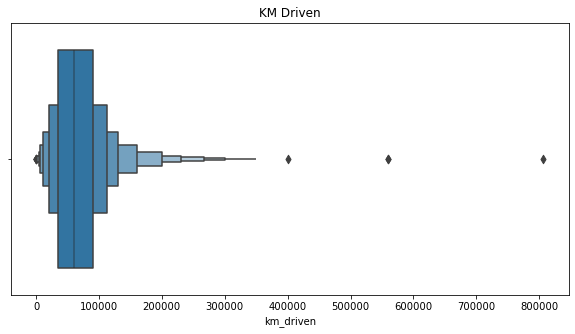

In [9]:

f, ax = plt.subplots(figsize=(10, 5))

ax.ticklabel_format(style='plain', axis='both')

sns.boxenplot(car.km_driven, ax=ax).set_title('KM Driven')

plt.show()

#### Removing outliers

In [10]:
# removing outliers
car=car[car.km_driven<400000]

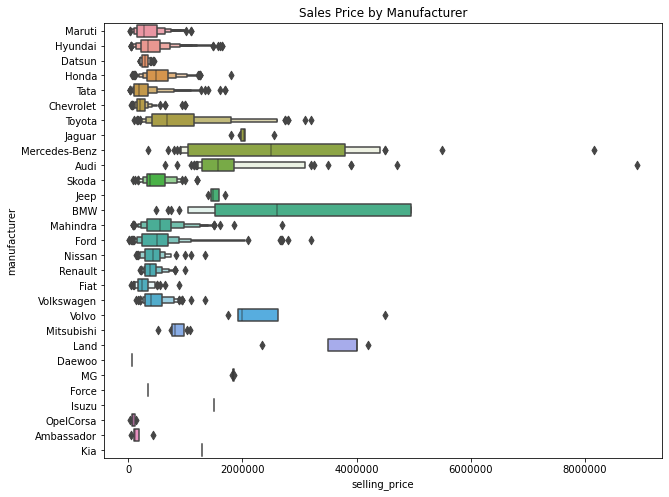

In [11]:

f, ax = plt.subplots(figsize=(10, 8))

ax.ticklabel_format(style='plain', axis='both')

sns.boxenplot(data= car, x='selling_price', y='manufacturer', ax=ax).set_title('Sales Price by Manufacturer')

plt.show()

In [12]:
car.manufacturer.value_counts()

Maruti           1277
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            205
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: manufacturer, dtype: int64

#### if number of records per manufacturer is 1 then 'Rest'

In [13]:
cars_rest_filter=car.manufacturer.value_counts()[car.manufacturer.value_counts()==1].index.to_list()

In [14]:
car.loc[(car.manufacturer.isin(cars_rest_filter)), 'manuf']='Rest'
car.loc[~(car.manufacturer.isin(cars_rest_filter)), 'manuf']=car['manufacturer']

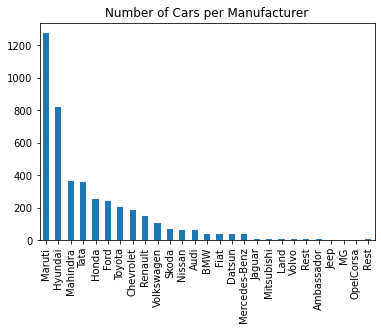

In [15]:
pd.concat([car.manuf.value_counts(), 
               pd.Series(car.manuf.value_counts(), index=['Rest'])]).plot.bar(rot=90)
plt.title('Number of Cars per Manufacturer')
plt.show()

/Users/nkutova/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

  fig = plt.figure(figsize=figsize)


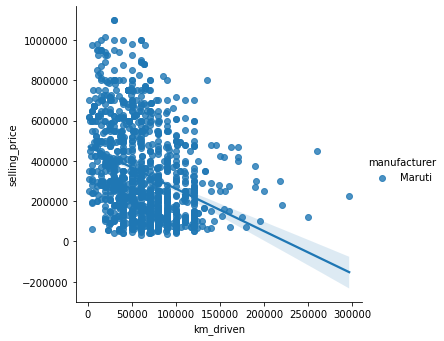

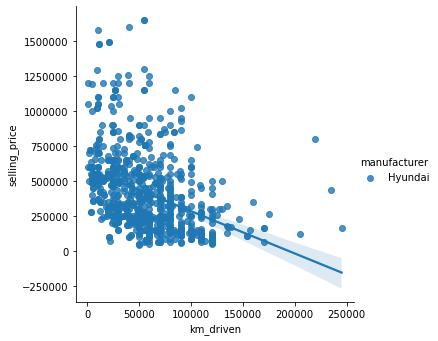

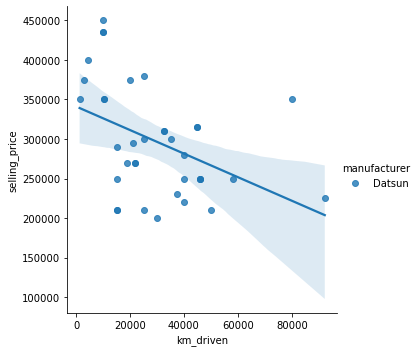

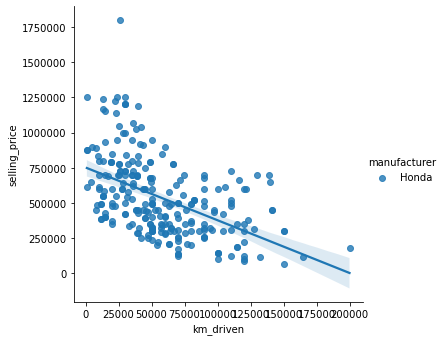

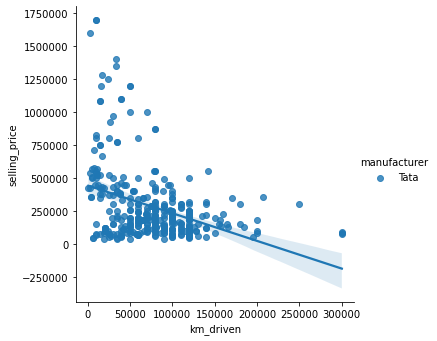

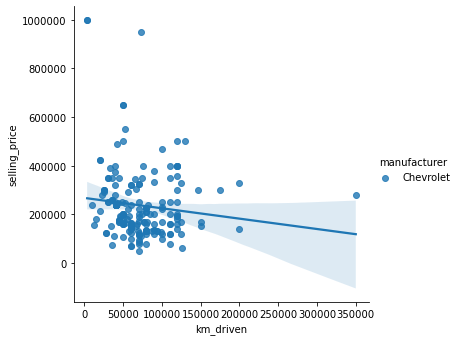

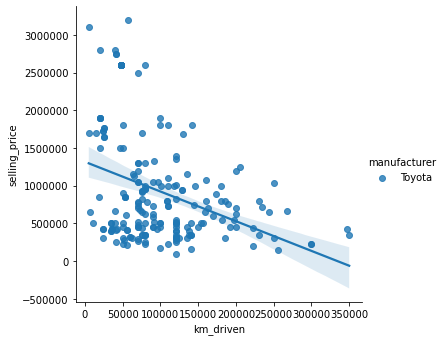

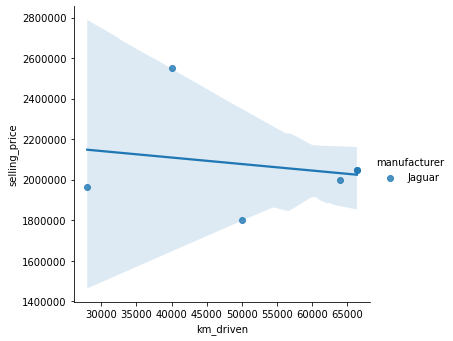

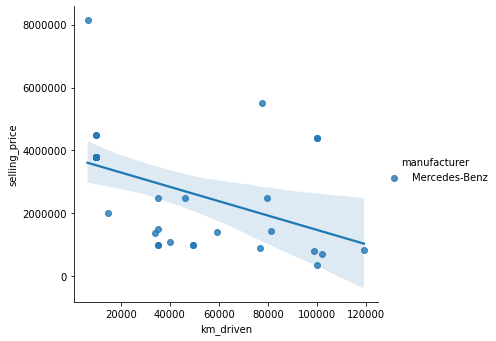

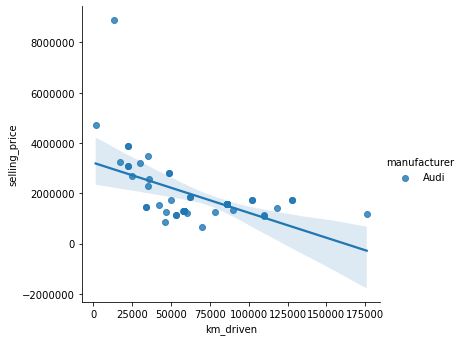

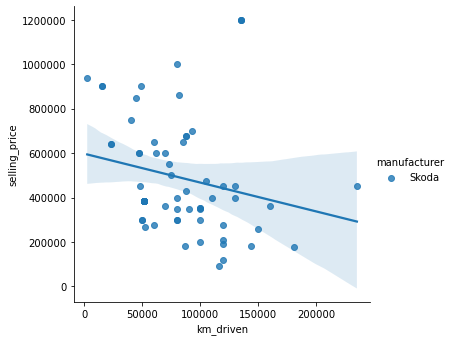

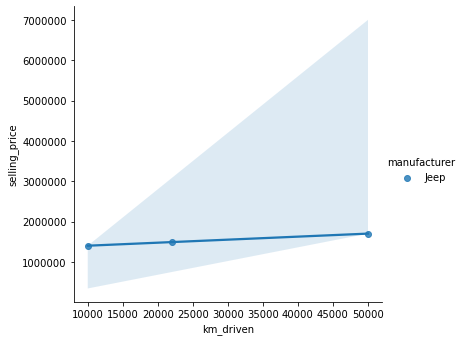

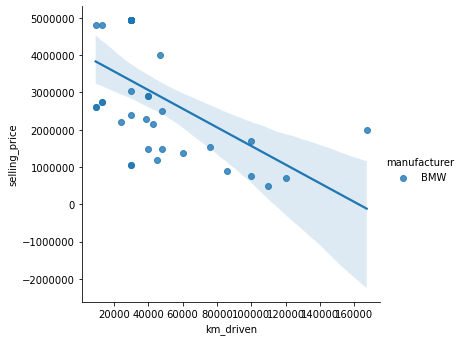

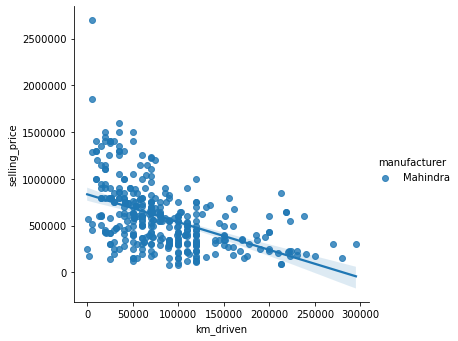

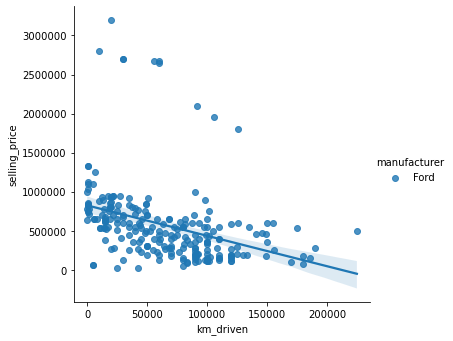

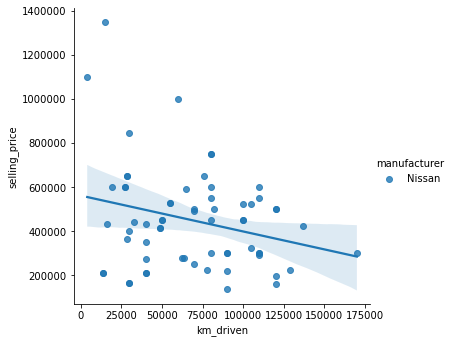

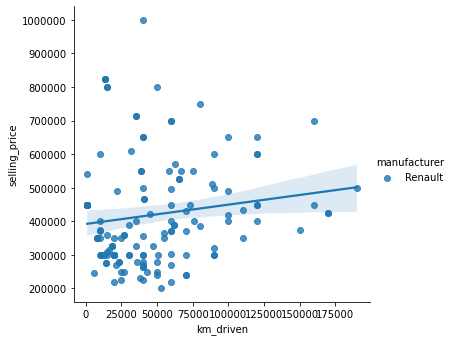

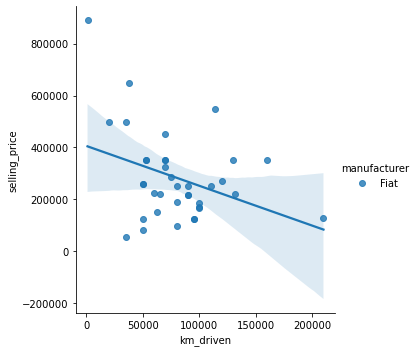

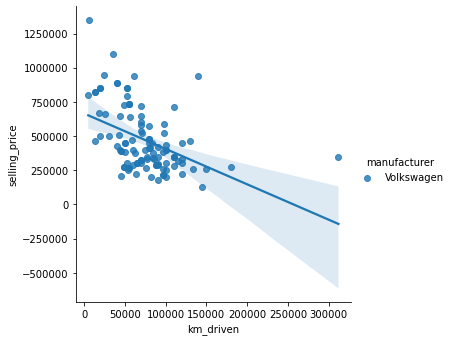

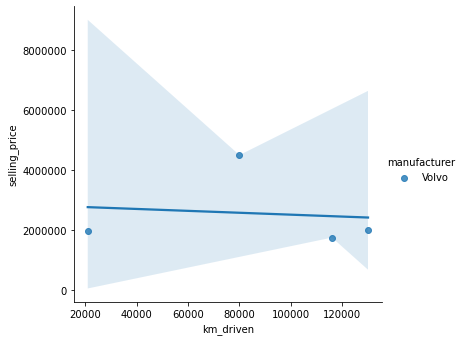

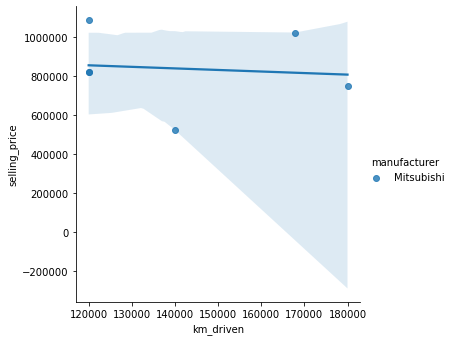

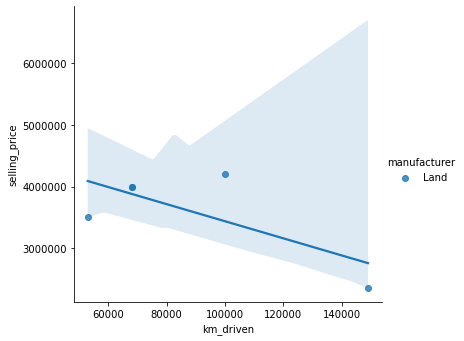

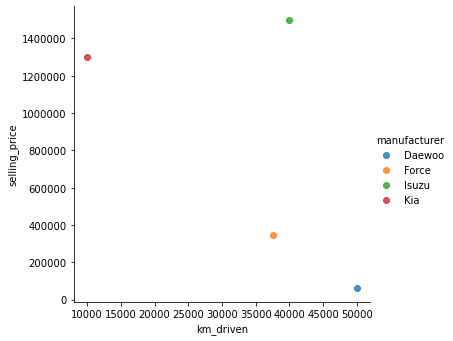

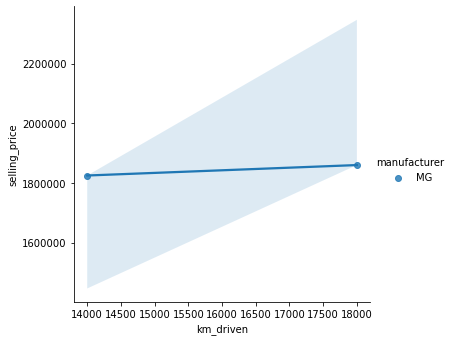

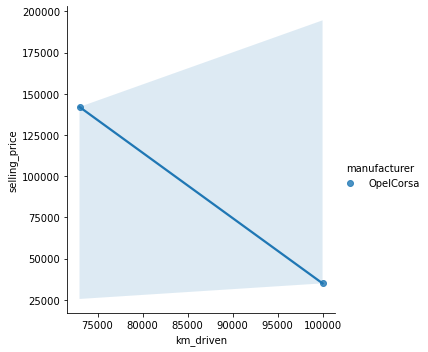

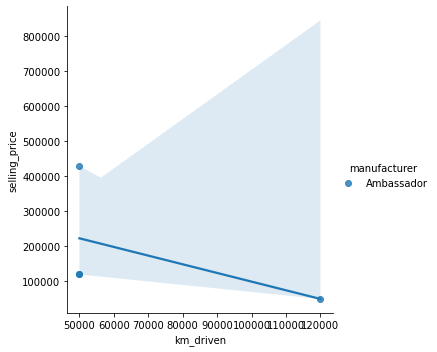

In [30]:
for i in car.manuf.unique():
    sns.lmplot(x='km_driven', y='selling_price',data=car[(car.manuf==i)], hue='manufacturer' )
    plt.ticklabel_format(style='plain', axis='y')

## Resgression

In [17]:
car=car.join(pd.get_dummies(car.fuel))

In [18]:
car=car.join(pd.get_dummies(car.seller_type))

In [19]:
car=car.join(pd.get_dummies(car.transmission))

In [20]:
car=car.join(pd.get_dummies(car.owner))

In [21]:
car=car.join(pd.get_dummies(car.manuf))

In [22]:
y=car.selling_price

In [26]:
car.head().T

,0,1,2,3,4
name,Maruti 800 AC,Maruti Wagon R LXI Minor,Hyundai Verna 1.6 SX,Datsun RediGO T Option,Honda Amaze VX i-DTEC
year,2007,2007,2012,2017,2014
selling_price,60000,135000,600000,250000,450000
km_driven,70000,50000,100000,46000,141000
fuel,Petrol,Petrol,Diesel,Petrol,Diesel
seller_type,Individual,Individual,Individual,Individual,Individual
transmission,Manual,Manual,Manual,Manual,Manual
owner,First Owner,First Owner,First Owner,First Owner,Second Owner
manufacturer,Maruti,Maruti,Hyundai,Datsun,Honda
manuf,Maruti,Maruti,Hyundai,Datsun,Honda


In [27]:
X=car.drop(['name','selling_price', 'fuel', 'seller_type', 'transmission', 'owner', 'manufacturer','manuf' ],  axis=1)

In [28]:
X = sm.add_constant(X)

In [29]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            


Dep. Variable:          selling_price   R-squared:                       0.689

Model:                            OLS   Adj. R-squared:                  0.686

Method:                 Least Squares   F-statistic:                     250.4

Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00

Time:                        14:52:02   Log-Likelihood:                -61153.

No. Observations:                4336   AIC:                         1.224e+05

Df Residuals:                    4297   BIC:                         1.226e+05

Df Model:                          38                                         

Covariance Type:            nonrobust                                         


                           coef    std err          t      P>|t|      [0.025      0.975]

----------------------------------------------------------------------------------------

const             